# Create an app for the public health

**Objective**
Find innovative ideas of application regarding food industry.  
Project: Predict the nutriscore of a product
https://en.wikipedia.org/wiki/Nutri-score
***
Data description: https://world.openfoodfacts.org/data/data-fields.txt  
Data storage: https://world.openfoodfacts.org/data
***
Application: **Get the nutritional score for every meal/recipe** given each ingredient and quantity, so you can track your food consumption.  
*Application description*: 
The user can scan the bar code of each element, then enter the quantity of each product. 
The algorithm will calculate the proportion of each nutriment of the meal/recipe for 100g, then return the nutriscore.Based on your food consumption, we could recommand specific meal/recipe.  
The purpose of this study is to determine the nutriscore of each product based on its nutriments. This is a classification problem.
***
This project is divided into two notebooks:  
- Data cleaning & exploratory
- Prediction

The following notebook is dedicated to the data analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-an-app-for-the-public-healt" data-toc-modified-id="Create-an-app-for-the-public-healt-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create an app for the public healt</a></span></li><li><span><a href="#Packages-imported" data-toc-modified-id="Packages-imported-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Packages imported</a></span></li><li><span><a href="#Data-Discovery" data-toc-modified-id="Data-Discovery-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Discovery</a></span><ul class="toc-item"><li><span><a href="#General-infos" data-toc-modified-id="General-infos-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>General infos</a></span></li><li><span><a href="#Data-cleaning-&amp;-features-testing" data-toc-modified-id="Data-cleaning-&amp;-features-testing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data cleaning &amp; features testing</a></span></li><li><span><a href="#Data-distribution" data-toc-modified-id="Data-distribution-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Data distribution</a></span></li><li><span><a href="#Outliers-detection" data-toc-modified-id="Outliers-detection-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Outliers detection</a></span></li><li><span><a href="#Filling-NaN" data-toc-modified-id="Filling-NaN-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Filling NaN</a></span></li></ul></li><li><span><a href="#Features-analysis" data-toc-modified-id="Features-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Features analysis</a></span><ul class="toc-item"><li><span><a href="#Numerical-VS-Numerical---Pearson" data-toc-modified-id="Numerical-VS-Numerical---Pearson-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Numerical VS Numerical - Pearson</a></span></li><li><span><a href="#Num-VS-Categorical---ANOVA-analysis" data-toc-modified-id="Num-VS-Categorical---ANOVA-analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Num VS Categorical - ANOVA analysis</a></span></li><li><span><a href="#Categorical-VS-Categorical---Contingency,-CHI2-Test" data-toc-modified-id="Categorical-VS-Categorical---Contingency,-CHI2-Test-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Categorical VS Categorical - Contingency, CHI2 Test</a></span></li></ul></li><li><span><a href="#Export-cleaned-Data_set" data-toc-modified-id="Export-cleaned-Data_set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Export cleaned Data_set</a></span></li></ul></div>

# Packages imported

In [1]:
#Data manipulation
import pandas as pd
import numpy as np

#Graphical
import matplotlib.pyplot as plt
import seaborn as sns

#Statistical
import scipy.stats as stats
from scipy.stats import chi2_contingency, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.ensemble import RandomForestClassifier

#Others
from collections import Counter

import gc

# Data Discovery

In [2]:
data = pd.read_csv("food.csv", sep='\t')
data.head(1)

C:\Users\jules\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset is taking lots of internal memory spaces, in order to study this dataset, one option would be to sample it, being careful to have the right output representation. 

In [3]:
#178 columns
#1122142 lines
#dtypes: float64(120), int64(2), object(56)

## General infos

In [4]:
# Infos
print(data.info())
# print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122142 entries, 0 to 1122141
Columns: 178 entries, code to carnitine_100g
dtypes: float64(120), int64(2), object(56)
memory usage: 1.5+ GB
None


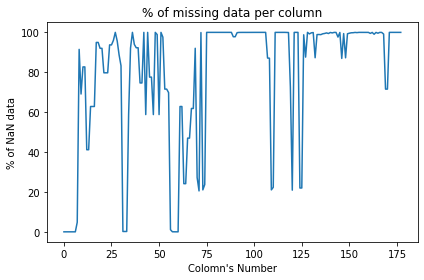

In [5]:
#Study of missing values
SIZE = data.index.size
columns = data.columns

column_number = [i for i in range(0,columns.size)]
na = data.isna().sum()*100/SIZE
na_percentage = na.values

# plt.figure(figsize=(20,10))
plt.plot(column_number,na_percentage)
plt.xlabel("Colomn's Number")
plt.ylabel("% of NaN data")
plt.title("% of missing data per column")
plt.tight_layout()

In [6]:
#Number of values with at least 50% data available
sum(na_percentage <50)

31

In [7]:
#Number of nutriscore available
data["nutriscore_grade"].count()

319188

In [8]:
print(f'{data["nutriscore_grade"].count().sum()*100/SIZE:.2f} % of total products have their nutriscore')
print(f'Values of nutriscore available: {data["nutriscore_grade"].unique()}')
# print(data["pnns_groups_1"].unique())
# print(data["pnns_groups_2"].unique())
# print(data["nutriscore_score"].unique())
      
#Analyze will be applied only on columns with sufficient data
columns = data.columns
index = (na<=30)
print(f"Data with at least 70% products information: {columns[index].values}")

28.44 % of total products have their nutriscore
Values of nutriscore available: [nan 'd' 'b' 'a' 'c' 'e']
Data with at least 70% products information: ['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'countries' 'countries_tags'
 'countries_en' 'pnns_groups_1' 'pnns_groups_2' 'states' 'states_tags'
 'states_en' 'image_url' 'image_small_url' 'energy-kcal_100g'
 'energy_100g' 'fat_100g' 'saturated-fat_100g' 'carbohydrates_100g'
 'sugars_100g' 'proteins_100g' 'salt_100g' 'sodium_100g']


In [9]:
# #Get all nutrition elements
# cl = columns.tolist()
# cl[65:]
# data["countries"].unique()

From the column number 65 to the end, you have the nutriment information. Those columns will enable us to calcule the nutriscore. We can see with the above graph that lots of this columns don't have enough data available. 

## Data cleaning & features testing

Checking for duplicated rows.

In [10]:
duplicated_row = data[data.duplicated(subset=['code', 'product_name'])].index
print(f"They are {duplicated_row.size} duplicated row")
# print(duplicated_row[:10])
data.drop(labels=duplicated_row, inplace=True)

They are 257 duplicated row


Before starting to work on the data, we conduct a random forest to test the feature's importance of numerical values. Then we will study the most important features. 

In [11]:
# #Categorical features
# index = (na<90)
# cat = [i for i in columns[index] if data[i].dtypes =='object']
# data[cat].nunique()
# # data.columns[cat[data[cat].nunique()<50]]

In [12]:
# data_set = data[num]
# data_set.describe()

In [13]:
index = (na<99)
#Get numerical data with at least 1% data available
num = [i for i in columns[index] if data[i].dtypes =='float64' or data[i].dtypes =='int64']

data_set = data[num].copy()
# print(data_set[tmp].count())
data_set[num] = data_set[num].applymap(lambda x: 900 if x>100 else (0 if x<0 else x))

#convert y to numerical values
potential_score = ['a','b','c','d','e'] 
def convert_score(s):
    if s not in potential_score or type(s) is not str:
        return np.NaN
    else:
        if s =="a":
            s=1
        elif s=="b":
            s=2
        elif s=="c":
            s=3
        elif s=="d":
            s=4
        elif s=="e":
            s=5
        return int(s)

data_set[num] = data_set[num].fillna(data_set[num].median())
data_set["nutriscore_grade"] = data["nutriscore_grade"].apply(convert_score)
data_set.dropna(inplace=True)

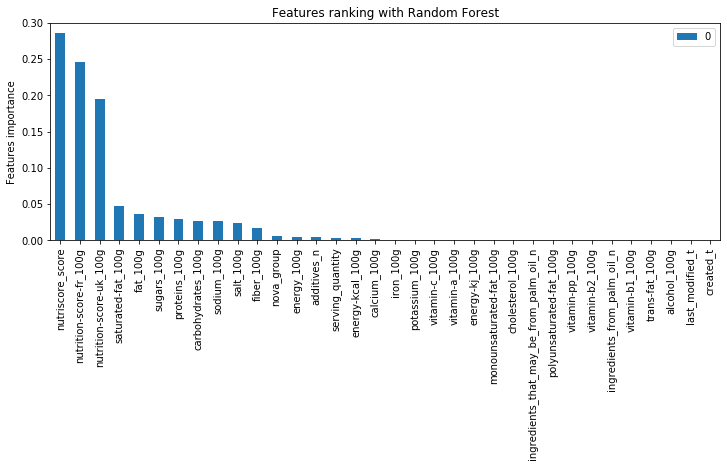

In [14]:
# Fit a Random Forest  
X = data_set.iloc[:,:-1]
y = data_set.iloc[:,-1]

rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
rf.fit(X,y)

# Features importances:
pd.DataFrame(rf.feature_importances_,index=X.columns).sort_values(
    by=0,ascending=False).plot(kind='bar',figsize=(12,4))
plt.ylabel('Features importance')
plt.title('Features ranking with Random Forest')
plt.show()

del data_set

In [15]:
col = pd.DataFrame(rf.feature_importances_,index=X.columns).sort_values(
    by=0,ascending=False).index[3:18]
data[col].count()

saturated-fat_100g    856028
fat_100g              886050
sugars_100g           871694
proteins_100g         887682
carbohydrates_100g    885988
sodium_100g           875432
salt_100g             875483
fiber_100g            308341
nova_group            338801
energy_100g           891885
additives_n           462500
serving_quantity      284637
energy-kcal_100g      816404
calcium_100g          146655
iron_100g             143009
dtype: int64

We have two types of features : those with at least 800K data available and the others, we will continue our study with the columns that have more that 50% data available.

In [16]:
new_columns = ["nutriscore_grade",'energy-kcal_100g', 
               'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
               'proteins_100g', 'salt_100g', 'sodium_100g']

column_to_drop = [i for i in columns if i not in new_columns]

# data.drop(column_to_drop,axis = 1, inplace=True)
df = data.drop(column_to_drop,axis = 1)

In [17]:
df.describe()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
count,8.164040e+05,886050.000000,856028.000000,885988.000000,871694.000000,887682.000000,875483.000000,875432.000000
mean,1.174432e+03,14.185997,5.315663,28.350921,13.987573,8.596152,2.490848,0.997720
std,7.050614e+03,199.760815,19.447537,38.679439,23.476553,47.920505,138.510699,55.412172
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-800.000000,0.000000,0.000000
25%,4.390000e+02,0.700000,0.100000,3.500000,0.700000,1.250000,0.050800,0.020320
50%,1.117000e+03,7.000000,1.920000,15.000000,3.900000,5.900000,0.508000,0.203200
75%,1.682000e+03,21.800000,7.500000,53.570000,20.000000,12.000000,1.343660,0.537464
max,5.578665e+06,153679.464286,14900.000000,20000.000000,7400.000000,31000.000000,99500.000000,39800.000000


There are lots of outliers here, with either negative value or over 100g of nutriment for a 100g quantity. Plus the nutriscore goes from a to e, and we want to work with numbers to facilitate the classification.

In [18]:
potential_score = ['a','b','c','d','e'] 

def convert_g(g):
    if  g >= 100 or g <0:
        return np.NaN
    else:
        return g

def convert_nrj(j):
#The maximum caloric content would be to eat pure fat. 
#100 grams of pure fat or oil would contain 900 kgcal.
    if  j >= 900 or j<0:
        return np.NaN
    else:
        return j

def convert_score(s):
    if s not in potential_score or type(s) is not str:
        return np.NaN
    else:
        if s =="a":
            s=1
        elif s=="b":
            s=2
        elif s=="c":
            s=3
        elif s=="d":
            s=4
        elif s=="e":
            s=5
        return int(s)

##Solution1
# df = pd.get_dummies(df,columns='nutriscore_grade',prefix=nutriscore)
##Solution2
# df['nutriscore_grade'].replace({1: 'a', 2: 'b', 3: 'c', 4: 'd',5: 'e',np.NaN: 'NaN'}, inplace= True)

In [19]:
for i in new_columns[2:]:
    df[i] = df[i].apply(convert_g)
df['energy-kcal_100g'] = df['energy-kcal_100g'].apply(convert_nrj)
df['nutriscore_grade'] = df['nutriscore_grade'].apply(convert_score)
print(f'Checking of Nutriscore\'s values: {df["nutriscore_grade"].unique()}')
df.describe()

Checking of Nutriscore's values: [nan  4.  2.  1.  3.  5.]


,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
count,319161.000000,342028.000000,880569.000000,855924.000000,882092.000000,869843.000000,887555.000000,874331.000000,874881.000000
mean,3.264177,381.470555,13.256233,5.264275,27.912679,13.759186,8.452419,1.331428,0.564796
std,1.319203,262.848109,16.427079,7.877690,27.838635,19.725024,9.648221,4.803160,2.303611
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,167.000000,0.700000,0.100000,3.400000,0.700000,1.250000,0.050800,0.020320
50%,3.000000,351.000000,6.940000,1.920000,15.000000,3.810000,5.900000,0.500000,0.200000
75%,4.000000,598.000000,21.430000,7.500000,53.000000,20.000000,12.000000,1.330000,0.534416
max,5.000000,898.000000,99.990000,99.900000,99.990000,99.990000,99.900000,99.990000,98.000000


We can see the energy per 100 g had lots of outliers, more than 500000 values, when each of the other nutriment have at least 850000 products available.  
So the feature energy per 100g will not be used to calculate the nutriscore.

## Data distribution

**Nutriments per 100g**

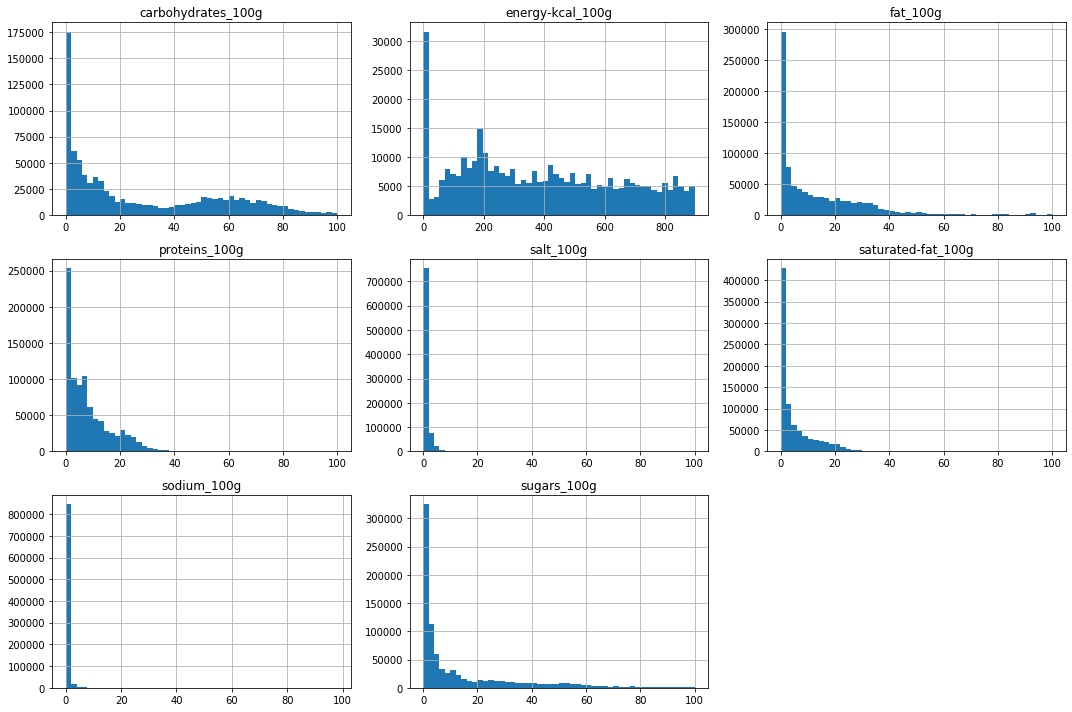

In [20]:
#Data ditribution
df[df.columns[1:]].dropna(thresh=1).hist(figsize=(15,10), bins=50)
plt.tight_layout()

In [21]:
def univariate_analysis(columns,dataframe):
    uni_analysis = pd.DataFrame(columns=["name","available_product","mean","var","std","skew","kurtosis"])
    
    number= []
    mean = []
    var = []
    std = []
    skew=[]
    kurtosis=[]
    
    for i in columns:
        number.append(df[i].count().sum())
        mean.append(df[i].mean())
        var.append(df[i].var(ddof=0))
        std.append(df[i].std(ddof=0))
        skew.append(df[i].skew())
        kurtosis.append(df[i].kurtosis())
        
    uni_analysis["name"]=new_columns[3:]
    uni_analysis["available_product"]=number
    uni_analysis["mean"]=mean
    uni_analysis["var"]=var
    uni_analysis["std"]=std
    uni_analysis["skew"]=skew
    uni_analysis["kurtosis"]=kurtosis

    return uni_analysis

univariate = univariate_analysis(new_columns[3:],df)
univariate
# univariate[["name","skew"]]

,name,available_product,mean,var,std,skew,kurtosis
0,saturated-fat_100g,855924,5.264275,62.057929,7.877686,3.245075,19.951167
1,carbohydrates_100g,882092,27.912679,774.988695,27.838619,0.687403,-0.934150
2,sugars_100g,869843,13.759186,389.076107,19.725012,1.776040,2.532762
3,proteins_100g,887555,8.452419,93.088071,9.648216,2.589128,12.432803
4,salt_100g,874331,1.331428,23.070324,4.803158,13.219561,213.123226
5,sodium_100g,874881,0.564796,5.306616,2.303609,14.980132,299.231540


The Skewness being strong for multiple features, we will need to scale the features for the classification. Even scaled, this can lead to the overweigth of very high values in the model. In this case, it is possible to transform it with the log function to reduce this skewness.

**Nutriscore**

319161 nutriscores available


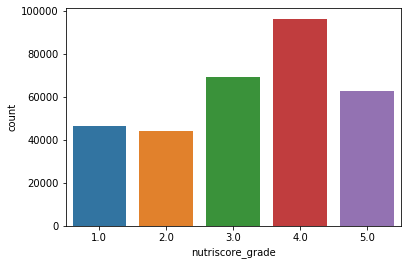

In [22]:
g=sns.countplot(df['nutriscore_grade'])
print(f"{df['nutriscore_grade'].count()} nutriscores available")

The distribution of nutriscore_grade being uneven, we will need to stratify the data set in order to have a relevant training set. 

## Outliers detection

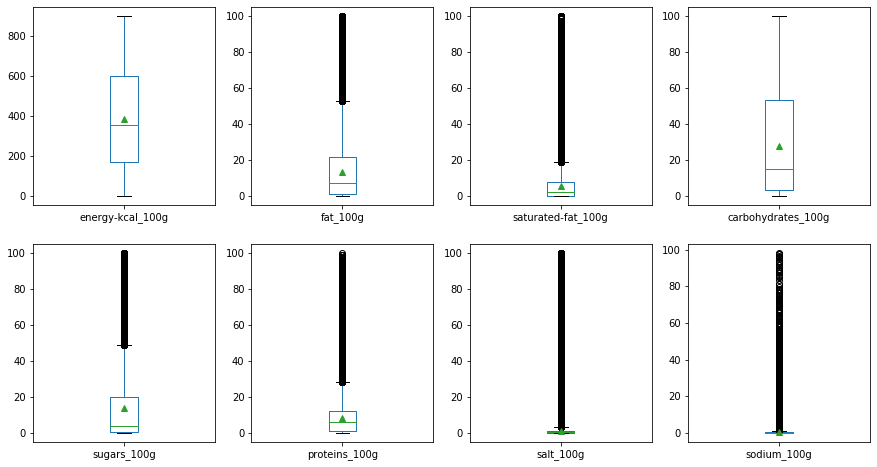

In [23]:
# Boxplot
fig, ax = plt.subplots(ncols=4, nrows=2,  figsize=(15,8))
for i, feat in enumerate(new_columns[1:]):
    if i<4:
        axj=i
        axi=0
    elif i>=4 and i<8:
        axi=1
        axj = i-4
    elif i>=8:
        axi=2
        axj=i-8
    df[feat].dropna().plot(kind='box',showmeans=True, ax=ax[axi,axj])

The cleaning function made sure that each nutriment data is within its possible range. However, within this range, we notice that there are still lots of outliers needed to be remove. For instance, it is very unlikely that a food product has over 50 g of sugar per 100 g or over 35g of protein. So using the Tukey methodology, we will remove products with at least two outliers and get the max values possible according to Tukey methodology if they have one outlier.

In [24]:
# Outlier detection 
def detect_outliers(dataframe,n,features):
    """
    Return the list of the indexes corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = dataframe[col].quantile(0.25)
        # 3rd quartile (75%)
        Q3 = dataframe[col].quantile(0.75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step )].index
#         print(f"Number of outliers for {col}: {len(outlier_list_col)}")
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than X outliers
    
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [25]:
Outliers_to_drop3 = detect_outliers(df,3, new_columns[1:])
print(f"There are {len(Outliers_to_drop3)} observations with at least {3} outliers")

df.drop(Outliers_to_drop3, axis = 0,inplace=True)
# df.loc[Outliers_to_drop] # Show the outliers rows


Outliers_to_drop2 = detect_outliers(df,2, new_columns[1:])
print(f"There are {len(Outliers_to_drop2)} observations with at least {2} outliers")

Outliers_to_drop1 = detect_outliers(df,1, new_columns[1:])
print(f"There are {len(Outliers_to_drop1)} observations with at least {1} outlier")

# max_outlier = []
# for i,col in enumerate(df.columns[3:]):
#     max_outlier.append(df[col].quantile(0.75)+1.5*(df[col].quantile(0.75)-df[col].quantile(0.25)))
#     df[col] = df[col].apply(lambda x: max_outlier[i] if x> max_outlier[i] else x)
# #     print(col, max_outlier[i])

There are 600 observations with at least 3 outliers
There are 11657 observations with at least 2 outliers
There are 71017 observations with at least 1 outlier


We will keep the product with only 1 outlier, since we have a large variety of products and the outliers are continuous, they represent potential products.

## Filling NaN

In [26]:
print(f"{df.dropna(subset=new_columns[1:],thresh=3).index.size*100/data.index.size:.2f}% of nutriscore can be computed, hence {df.dropna(subset=new_columns[1:],thresh=1).index.size} products")

79.33% of nutriscore can be computed, hence 900936 products


The product's category is indeed correlated with the nutriment quantity. However, the majority of the product's category is unknown as we can see to the 2nd graph below. Hence, the category will not be use to fill the nutriments' missing values.  

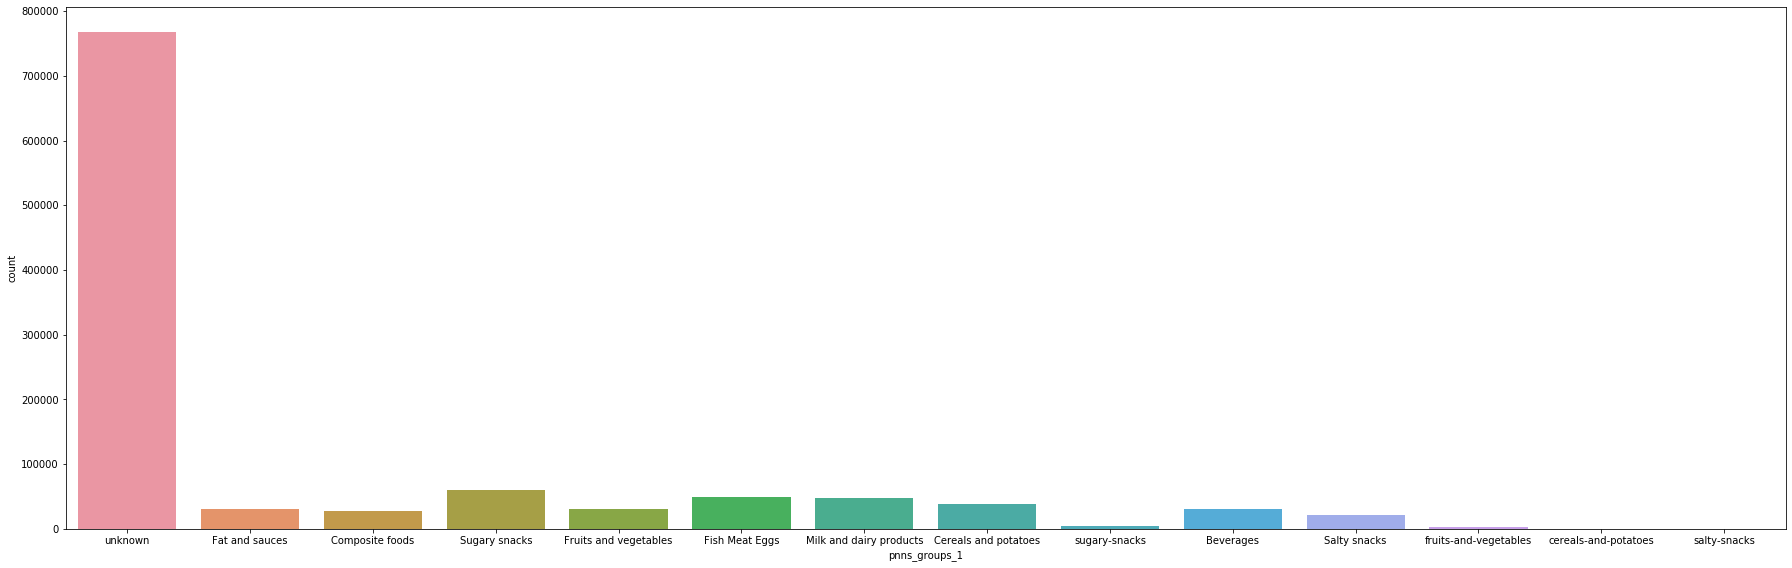

In [27]:
plt.figure(figsize=(25,8))
g=sns.countplot(data['pnns_groups_1'])
plt.tight_layout()

We still have more than 20% of missing data for the nutriment. The category of the product could be interesting to fill the nutriments' missing information(only 10000 NaN values out of the 1M1 products), as they seem to be coorelated (cf 2nd bellow graph), using for instance the mean of each category as it has lots of values.  

In [28]:
def compare_qual_quant(x,y):
    """x = qualitative, y = quantitative"""
    df1 = df
    df1[x] = data[x]
    sample = df1[df1[x] != 'unknown'].copy()

    sample.dropna(inplace=True)
    modalities = sample[x1].unique()

    groupes = []
    for m in modalities:
        groupes.append(sample[sample[x]==m][y])

    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
    plt.boxplot(groupes, labels=modalities, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    del sample, df1
    plt.xlabel(y)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

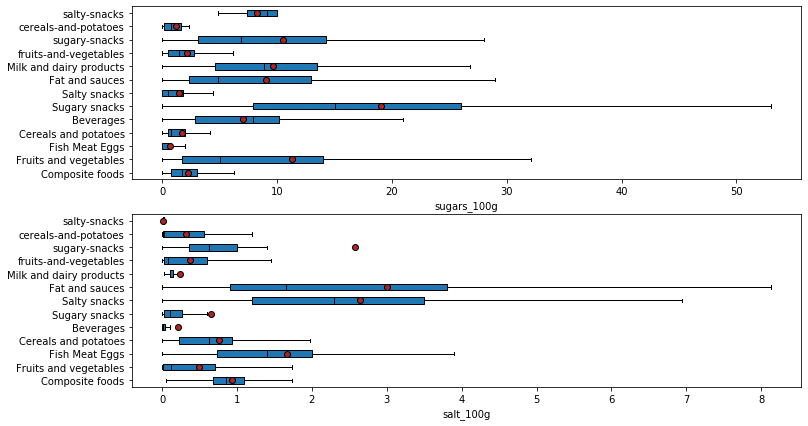

In [29]:
x1 = "pnns_groups_1" # qualitative
y1 = "sugars_100g" # quantitative
y2 = "salt_100g" # quantitative

plt.figure(figsize=(12,7))
plt.subplot(2, 1,1)
compare_qual_quant(x1,y1)
plt.subplot(2, 1,2)
compare_qual_quant(x1,y2)
plt.tight_layout

# Features analysis

In [30]:
# print(f"Size of the sample: {data_set.index.size}")
# # print(data_set.columns)
# X = data_set.iloc[:,1:]
# y = data_set.iloc[:,0]

# #Get the F_value for each feature
# best_features = SelectKBest(score_func=chi2, k=5)
# fit = best_features.fit(X,y)

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)

# #Get the best features related to the nutriscore
# features_scores = pd.concat([dfcolumns,dfscores],axis=1)
# features_scores.columns = ['Specs','Score']  #naming the dataframe columns
# print(features_scores.nlargest(15,'Score'))  #print 10 best features

## Numerical VS Numerical - Pearson

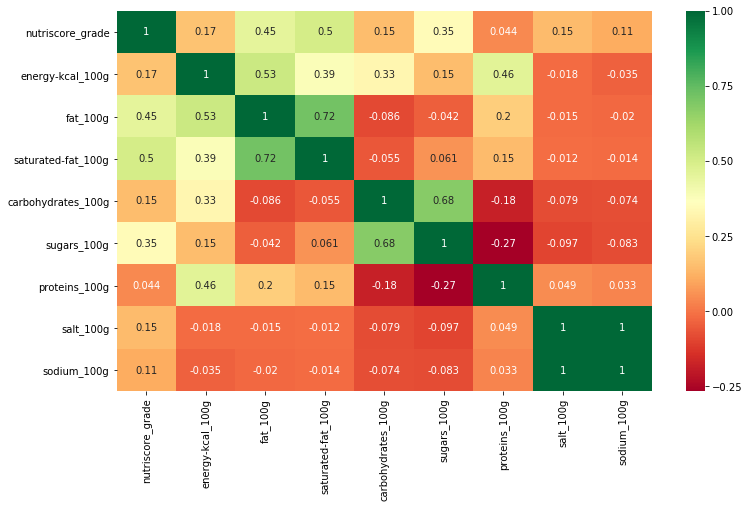

In [31]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,7))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

From the correlation matrix, the protein element does not seem to have a significative correlation with the nutrition score.
Fat and saturated fat seem correlated, so are sodium and salts.

In [32]:
# # TO COMPARE EACH NUMERICAL FEATURE'S CORRELATION
# # calculate Pearson's correlation
# df_fat = df.dropna(subset=['fat_100g','saturated-fat_100g'])
# df_s = df.dropna(subset=['salt_100g','sodium_100g'])
# corr1 = pearsonr(df_fat['fat_100g'], df_fat['saturated-fat_100g'])
# corr2 = pearsonr(df_s['salt_100g'], df_s['sodium_100g'])
# print('Pearsons correlation for fat & saturated_fat: %.3f' % corr1[0])
# print('Pearsons correlation for salt & sodium: %.3f' % corr2[0])
# del(df_fat)
# del(df_s)

In [33]:
# sns.regplot(df["saturated-fat_100g"],df["fat_100g"])
# plt.tight_layout()

## Num VS Categorical - ANOVA analysis

Study of dependency between the category of a product and its nutriment composition.

In [34]:
def quali_quanti(df,num,cat,show=False):
    data = df.dropna()
    results = ols(f'{num} ~ C({cat})',data=data).fit()
    anova_tab = sm.stats.anova_lm(results, typ=2)
    pval = anova_tab.iloc[0,-1]
    if show:
        sns.catplot(x=cat, y=num, data=data, kind="box", aspect=1, col='nutriscore_grade', showmeans=True)
        plt.tight_layout()
    del data
    return results, anova_tab, pval

In [35]:
df1 = df
df1["pnns_groups_1"] = data["pnns_groups_1"]
df1 = df1[df1["pnns_groups_1"]!="unknown"]

results,anova_tab,pval =  quali_quanti(df1,"sugars_100g","pnns_groups_1")
anova_tab

,sum_sq,df,F,PR(>F)
C(pnns_groups_1),1.835750e+06,12.0,2888.657228,0.0
Residual,5.095781e+06,96222.0,NaN,NaN


In [36]:
for quanti in new_columns[4:]:
    results, anova_tab, pval = quali_quanti(df1, quanti, "pnns_groups_1", show=False)
    if pval < 0.05 :
        print(f'pnns_groups_1 vs {quanti} : {pval} < 0.05, the independency is rejected')
    else : 
        print(f'pnns_groups_1 vs {quanti} : pval > 0.05, variables are dependant')

pnns_groups_1 vs carbohydrates_100g : 0.0 < 0.05, the independency is rejected
pnns_groups_1 vs sugars_100g : 0.0 < 0.05, the independency is rejected
pnns_groups_1 vs proteins_100g : 0.0 < 0.05, the independency is rejected
pnns_groups_1 vs salt_100g : 0.0 < 0.05, the independency is rejected
pnns_groups_1 vs sodium_100g : 0.0 < 0.05, the independency is rejected


## Categorical VS Categorical - Contingency, CHI2 Test

In [37]:
def cat_dependance(df, feat1, feat2, show=False):
    df = df.dropna()
    contingence = pd.crosstab(columns=df[feat2], index=df[feat1], normalize=False, margins=True, dropna=True)
    chi2, p, dof, expected = chi2_contingency(contingence)
    expected = pd.DataFrame(expected, columns=contingence.columns, index=contingence.index)
    
    if show:
        plt.figure(figsize=(12,7))
        ecarts_pond = ((contingence-expected)/expected).iloc[:-1,:-1]
        ax = plt.axes()
        sns.heatmap(ecarts_pond, annot=True, center=0)
        ax.set_title('Ecarts pondérés')
    if p < 0.05:
        print('p < 0.05, the hypothesis of indepency is rejected')
    else : 
        print('p > 0.05, the variable are independent\n')
    del(df)
    return chi2, p, dof, expected

In [38]:
chi2, p, dof, expected = cat_dependance(df1,"nutriscore_grade","pnns_groups_1")
del df1

p < 0.05, the hypothesis of indepency is rejected


# Export cleaned Data_set

In [39]:
df.drop(['energy-kcal_100g','pnns_groups_1'],axis="columns",inplace=True)
export_csv = df.to_csv (r'cleaned_dataframe.csv', index = None, header=True)